# Decision Trees Intro

## Part 1: The Restaurant Dataset

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

In [4]:
# This will get the dataset
# It's a good practice to go ahead and download it (curl/wget)
# and change this cell to read locally
df = pd.read_csv("../data/restaurant.csv")

In [5]:
df

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Wait
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No
5,No,Yes,No,Yes,Some,$$,Yes,Yes,Italian,0-10,Yes
6,No,Yes,No,No,None,$,Yes,No,Burger,0-10,No
7,No,No,No,Yes,Some,$$,Yes,Yes,Thai,0-10,Yes
8,No,Yes,Yes,No,Full,$,Yes,No,Burger,>60,No
9,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30,No


In [6]:
def pre_process_data(df, one_hot_encode = False):
    target = "Wait"    
    
    num_cols = df.select_dtypes(include=np.number).columns # numerical data
    cat_cols = df.select_dtypes(include=object).columns # categorical data
    
    if one_hot_encode:
        return pd.get_dummies(df)
    else:
        O_encoder = OrdinalEncoder()
        df[cat_cols]= O_encoder.fit_transform(df[cat_cols])
        
    return df

In [7]:
df2 = pre_process_data(df, False)
df2

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Wait
0,1.0,2.0,0.0,1.0,4.0,2.0,3.0,1.0,2.0,3.0,3.0
1,1.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,2.0,4.0
2,0.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,3.0
3,1.0,2.0,1.0,3.0,3.0,0.0,0.0,0.0,1.0,1.0,6.0
4,1.0,2.0,1.0,2.0,0.0,2.0,3.0,1.0,2.0,5.0,0.0
5,0.0,1.0,2.0,1.0,4.0,1.0,2.0,3.0,3.0,6.0,3.0
6,0.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0,3.0,1.0
7,0.0,0.0,0.0,1.0,4.0,1.0,2.0,3.0,4.0,0.0,3.0
8,0.0,1.0,3.0,2.0,0.0,0.0,1.0,2.0,0.0,5.0,0.0
9,1.0,3.0,3.0,3.0,3.0,2.0,3.0,1.0,3.0,7.0,5.0


Check out the documentation for [Decision Tree Classifiers](https://scikit-learn.org/1.5/modules/tree.html) and implement one for the Restaurant dataset. Print out your decision tree and its accuracy. (It's a small dataset so using all the data for training is OK)

In [8]:
# Your code!
y = df["Wait"]
X = df.drop("Wait", axis=1)

model = DecisionTreeClassifier()
model.fit(X, y)
print(model.score(X, y))

1.0


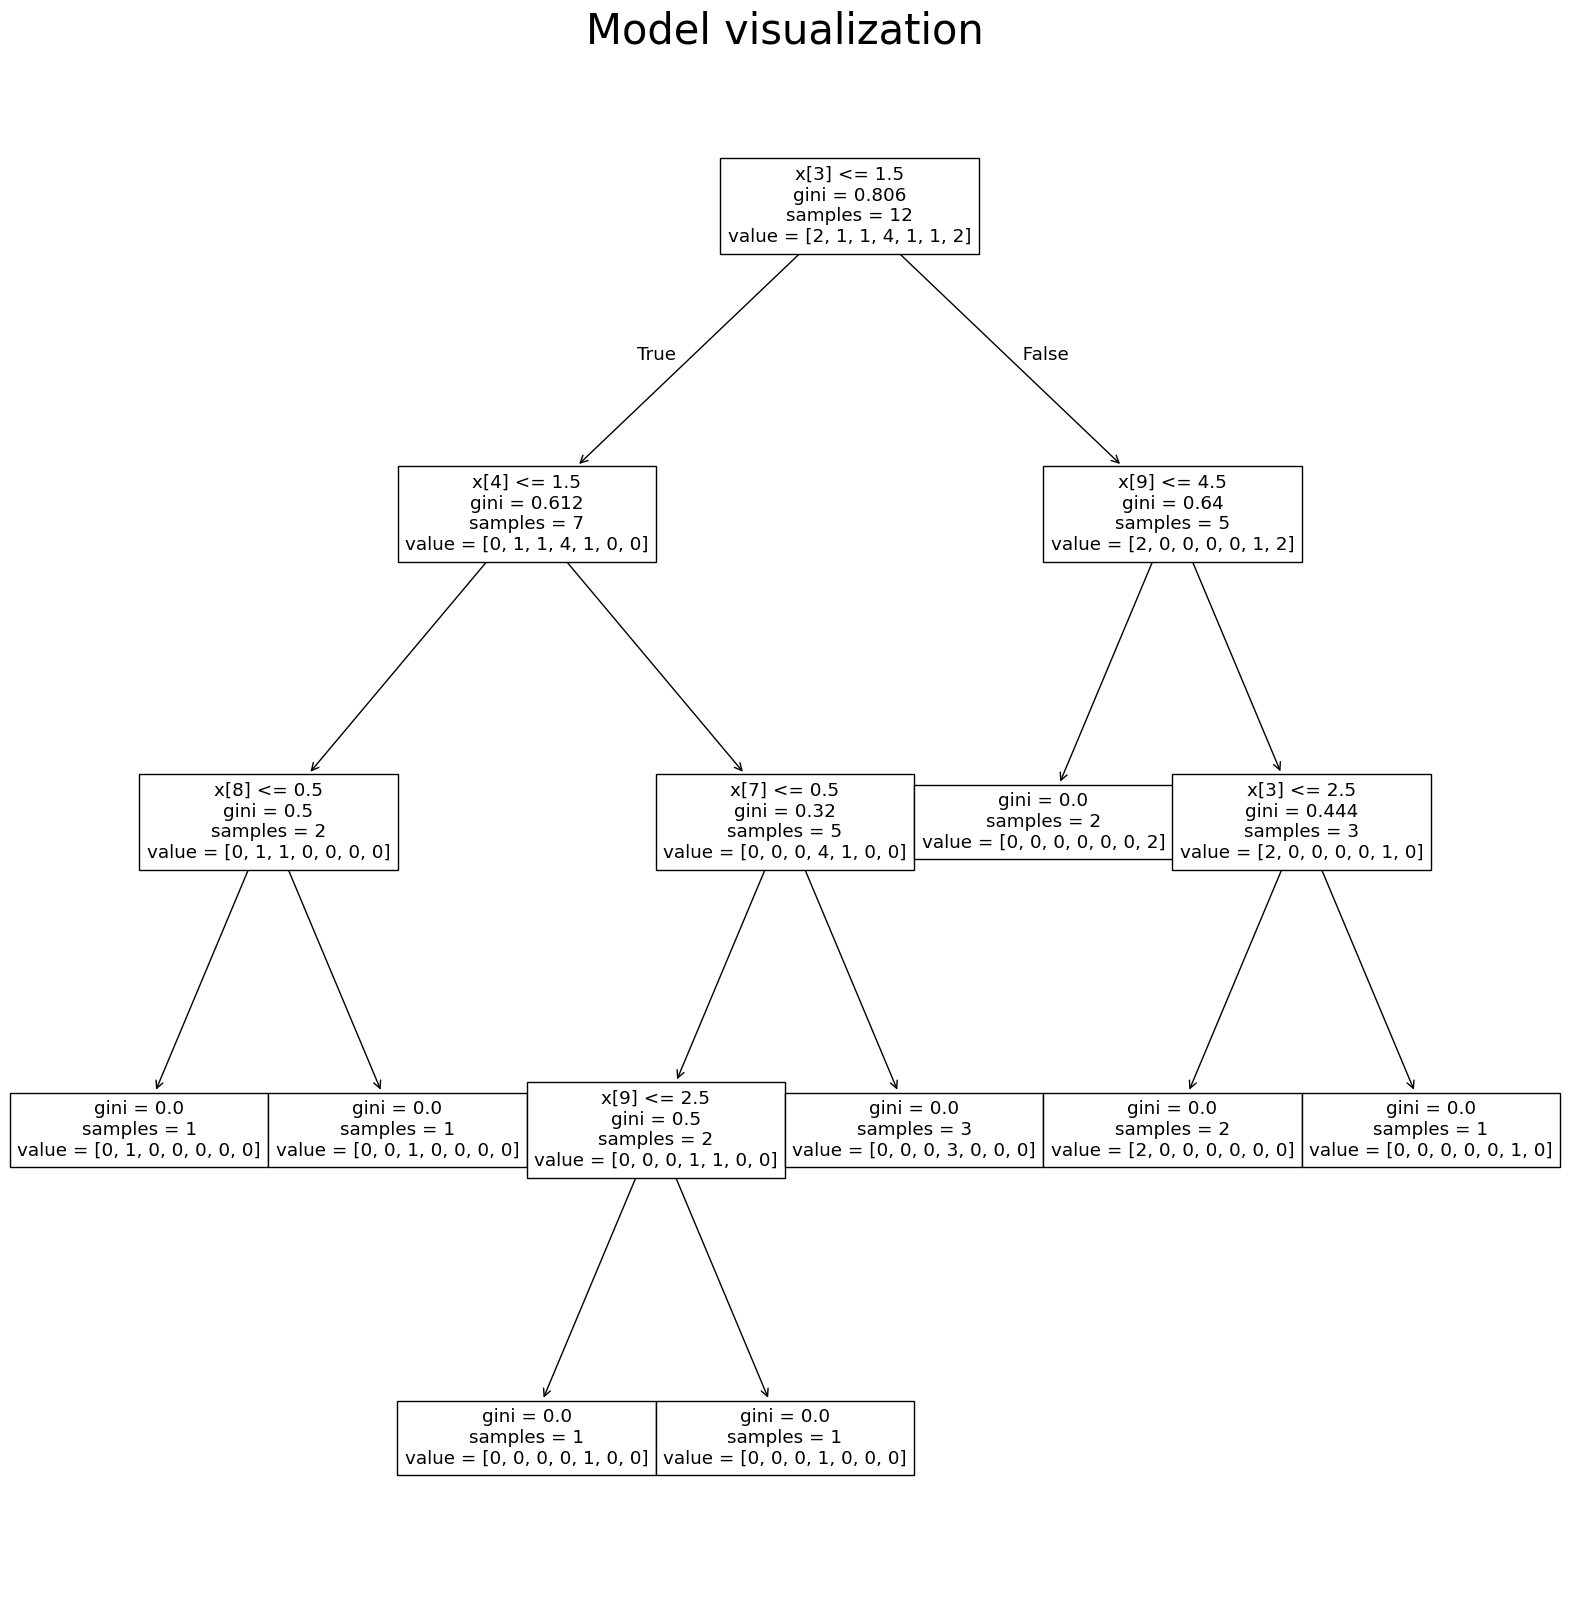

In [9]:
plt.figure(figsize=(20,20))

tree.plot_tree(model)
plt.title("Model visualization", fontsize = 30)
plt.show()

## Part 2: The entropy of English

Install nltk (natural language toolkit) following the commands below.

In [10]:
#!pip install nltk

The next cell will open an interactive window (which is a bit weird). Follow the prompts to download a library called 'brown'

In [11]:
import nltk

## delete the next line after you download "brown" (or comment it)
#nltk.download()

brown.words is a list of words

In [12]:
from nltk.corpus import brown

In [13]:
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [14]:
len(brown.words())

1161192

Your job is to use these words to compute, using standard python, the entropy of the English language. Only consider 27 characters -- the alphabet plus space.

In [15]:
import string

wordlist= brown.words()
wordlist = [word.lower() for word in wordlist]
alphabet = string.ascii_lowercase + " "

In [16]:
letterlist = np.hstack([[i for i in word if i in alphabet] for word in wordlist])
letterlist

array(['t', 'h', 'e', ..., 'i', 'n', 'g'], dtype='<U32')

In [17]:
counts = pd.Series(letterlist).value_counts()
counts[" "] = len(wordlist) - 1
counts

e     593146
t     438960
a     382803
o     360287
i     345755
n     336706
s     310753
r     291000
h     257234
l     196146
d     188295
c     147210
u     128799
m     120641
f     110672
p      95932
g      92584
w      89140
y      81774
b      72804
v      47261
k      31179
x       9435
j       7756
q       5103
z       4553
     1161191
Name: count, dtype: int64

In [27]:
total_letters = sum(counts)
print("total letters:", total_letters)
entropy = 0
for letter, count in counts.items():
    prob = count / total_letters
    #print(prob)
    entropy -= prob * np.log2(prob)
entropy

total letters: 5907119


np.float64(4.066635417081507)

The entropy of english is around 4.07. This makes sense, since 27 characters is less than 32 ($2^5$). Also, space is very frequent, twice as much as any other character, so it reduces the entropy a lot. This would more closesly reflect actual english with a larger wordlist, and considering characters like apostrophes, commas, and periods.

In [19]:
from nltk.corpus import gutenberg

In [20]:
wordlist2 = gutenberg.words()
len(wordlist2)

2621613

In [21]:
letterlist2 = np.hstack([[i for i in word.lower()] for word in wordlist2])
letterlist2

array(['[', 'e', 'm', ..., 'c', 'y', '.'], dtype='<U1')

In [22]:
counts2 = pd.Series(letterlist2).value_counts()
counts2[" "] = len(wordlist2) - 1
counts2

e    1119617
t     827161
a     731203
o     678136
h     650743
      ...   
î          1
=          1
+          1
~          1
     2621612
Name: count, Length: 69, dtype: int64

In [23]:
total_letters2 = sum(counts2)
entropy2 = 0
for letter, count in counts2.items():
    prob = count / total_letters
    entropy2 -= prob * np.log2(prob)
entropy2

np.float64(6.550354595638703)

The entropy is a lot higher, at 6.5. Looking at the character list, there's a lot that only appear once or twice, so i'll try removing those to make it closer to the original entropy. This would remove a lot of the really uncommon probabilities, bringing down the sum.

In [24]:
counts3 = counts2[counts2 > 100]
print(counts3)
print(len(counts3), " characters")
total_letters3 = sum(counts3)

e    1119617
t     827161
a     731203
o     678136
h     650743
n     615091
i     577691
s     556863
r     502402
d     400494
l     375313
u     252211
m     230032
f     209239
w     201292
,     192368
c     185849
y     176040
g     172048
b     139846
p     136173
v      83829
.      81851
k      66676
:      47625
"      31160
-      28030
;      27942
1      27496
'      21682
2      19221
j      15946
3      12421
?      10342
4       9287
x       9160
!       8660
q       7552
5       7171
6       6561
7       6030
8       5910
9       5753
0       5580
z       5525
)       1827
(       1821
_       1116
}        389
*        283
`        209
[        131
]        131
     2621612
Name: count, dtype: int64
54  characters


In [25]:
entropy3 = 0
for letter, count in counts3.items():
    prob = count / total_letters
    entropy3 -= prob * np.log2(prob)
entropy3

np.float64(6.5499312892931)

It looks like the entropy doesn't change much, only reducing by around 0.001. The change in entropy probably has something to do with the text source, or the fact that there are just a lot more characters to choose from.